# **Decoding Emotion in Music: Analyzing the Influence of Audio Features on Affective Perception Using Machine Learning**

# Load Data
- Check dataset structure: Column types, missing values.
- Visualize emotion distribution: Bar chart for class distribution.

In [142]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import label_binarize
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix


import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, roc_curve, auc, f1_score, confusion_matrix

# 不同的model对于feature的理解, 在model里面的performance, 以及在不同的feature下的performance, feature之间的关系, Theory(? Confirm/反驳), Error Analysis, 

In [143]:
# Load the dataset
emotion_music_df = pd.read_csv("datasets/merged_emotion_audio_features.csv")

In [144]:
emotion_music_df.head(20)

,track_id,emotion,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,3J0tOqhh6tQJJty0diKeW2,happy,0.139000,0.489,0.7620,0.000405,0,0.0819,-3.947000,1,0.0321,134.503998,4,0.6340
1,2uPgHqTZotNvcMVWuwkf5s,happy,0.068200,0.425,0.7790,0.000299,9,0.0679,-7.757000,1,0.1150,146.300003,4,0.5940
2,6XjsKdQbCVCtOjioJztgGA,happy,0.072100,0.319,0.8350,0.000287,0,0.0490,-3.422000,1,0.0440,169.835007,4,0.3350
3,4wQHk151amFYAuR6LNbBK7,happy,0.152000,0.442,0.9320,0.000681,4,0.3380,-3.358000,1,0.0763,130.723007,4,0.8440
4,1E5ZAgjqiDdnzfe4E52ghX,happy,0.475000,0.736,0.8910,0.002340,7,0.0741,-13.207000,1,0.0823,107.936996,4,0.9400
5,5dMwiHdaq8BoTtFGw2R6ac,happy,0.522000,0.705,0.7550,0.828000,9,0.1390,-9.098000,0,0.0330,101.725998,4,0.6640
6,3O1p099AHURof3nTgRUdOq,happy,0.965000,0.391,0.1140,0.000342,5,0.0749,-17.743000,1,0.0351,151.906998,3,0.3740
7,5K3Q1gue9nWLLwh6bYQFoB,happy,0.082400,0.496,0.5660,0.000000,0,0.1300,-13.749000,1,0.0350,89.913002,4,0.6720
8,3Zc9b3YS8wcGDzH92joizS,happy,0.131000,0.567,0.5720,0.000000,1,0.1780,-15.538000,1,0.0502,131.634003,4,0.7660
9,0gE63HwMeWgK30ONO4witM,happy,0.971000,0.344,0.1080,0.000000,5,0.0961,-16.631001,1,0.0475,61.188000,4,0.2630


In [145]:
# Count occurrences of each emotion
emotion_counts = emotion_music_df["emotion"].value_counts()
emotion_counts

emotion
sad         5234
angry       4978
happy       4831
fear        4759
surprise    4609
Name: count, dtype: int64

In [146]:
emotion_music_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24411 entries, 0 to 24410
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          24411 non-null  object 
 1   emotion           24411 non-null  object 
 2   acousticness      24411 non-null  float64
 3   danceability      24411 non-null  float64
 4   energy            24411 non-null  float64
 5   instrumentalness  24411 non-null  float64
 6   key               24411 non-null  int64  
 7   liveness          24411 non-null  float64
 8   loudness          24411 non-null  float64
 9   mode              24411 non-null  int64  
 10  speechiness       24411 non-null  float64
 11  tempo             24411 non-null  float64
 12  time_signature    24411 non-null  int64  
 13  valence           24411 non-null  float64
dtypes: float64(9), int64(3), object(2)
memory usage: 2.6+ MB


/var/folders/jw/cc3wc0f13632_rh4jzxbdz3w0000gn/T/ipykernel_74535/34517492.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=emotion_music_df["emotion"], order=emotion_counts.index, palette="viridis")


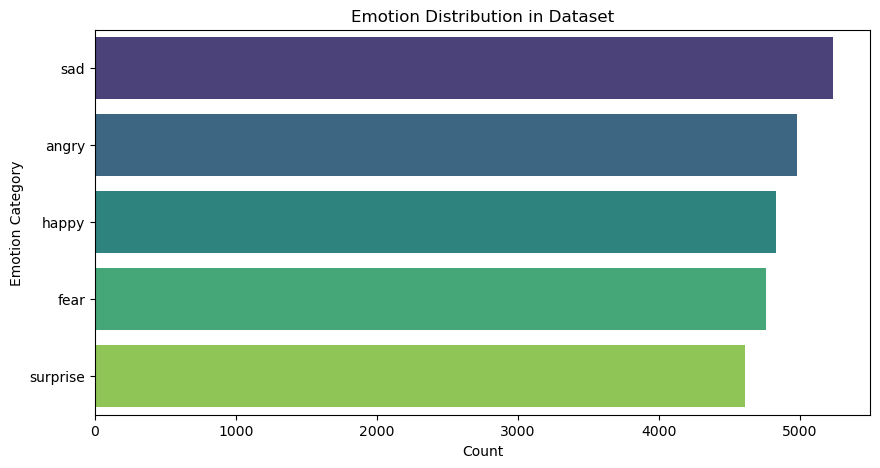

In [147]:
# Plot class distribution
plt.figure(figsize=(10, 5))
sns.countplot(y=emotion_music_df["emotion"], order=emotion_counts.index, palette="viridis")
plt.title("Emotion Distribution in Dataset")
plt.xlabel("Count")
plt.ylabel("Emotion Category")
plt.show()

# Data Preprocessing
Feature Scaling & Encoding
- Normalize continuous features using StandardScaler
- Encode categorical target variable (emotion) into numerical values

Train-Test Split
- Split the dataset into training (80%) and testing (20%) sets
- Use stratify=y to maintain class balance

## Drop Unnecessary Column and Abnormal Values

In [148]:
df = emotion_music_df.copy()

# Drop "Time_Signature" column
df = df.drop(columns=['time_signature'])

# Drop rows with tempo = 0
df = df[df['tempo'] > 0]

# Drop Track ID
df = df.drop(columns=['track_id'])

In [149]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Split

In [150]:
# Split into training (80%) and testing (20%) sets
feature_columns = df.columns.difference(['emotion'])  # All features except target
X = df[feature_columns]
y = df["emotion"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## Encoding

In [ ]:
# Encode target variable (emotion) as categorical

y_train = y_train.astype("category").cat.codes
y_test = y_test.astype("category").cat.codes

In [ ]:
# Select numerical features for standardization (excluding, 'mode', and 'key')

num_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
num_features.remove('mode')  # Mode is a binary variable (0/1), no need for scaling
num_features.remove('key')  # Key is an integer categorical variable, no need for scaling

## Scaler

In [153]:
# 1: Apply StandardScaler
scaler = StandardScaler()
X_train[num_features] = scaler.fit_transform(X_train[num_features])
X_test[num_features] = scaler.transform(X_test[num_features])  # Use same scaler from training

In [154]:
print(X_train.head())

       acousticness  danceability    energy  instrumentalness  key  liveness  \
275       -0.608517      0.742694 -0.244258         -0.542932    1  1.473905   
14822     -0.762684     -0.393636  1.097239         -0.534132    7 -0.696478   
12982     -0.758468      1.211924 -0.777672         -0.506378    9 -0.550907   
144        1.944849     -1.009854 -0.646309          1.582629    2 -0.550907   
1575      -0.753656      1.098856 -1.131955         -0.542329    6 -0.661733   

       loudness  mode  speechiness     tempo   valence  
275    1.139145     1    -0.502944  0.089409  0.061177  
14822  0.056811     1    -0.436379 -0.943261  1.710823  
12982  0.152720     1    -0.602793 -0.898472  1.856605  
144    0.385774     1    -0.525898 -1.416481 -0.437553  
1575  -1.766385     0    -0.494910  0.190667  1.557367  


In [155]:
print(X_train.info())

<class 'pandas.core.frame.DataFrame'>
Index: 19524 entries, 275 to 22892
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      19524 non-null  float64
 1   danceability      19524 non-null  float64
 2   energy            19524 non-null  float64
 3   instrumentalness  19524 non-null  float64
 4   key               19524 non-null  int64  
 5   liveness          19524 non-null  float64
 6   loudness          19524 non-null  float64
 7   mode              19524 non-null  int64  
 8   speechiness       19524 non-null  float64
 9   tempo             19524 non-null  float64
 10  valence           19524 non-null  float64
dtypes: float64(9), int64(2)
memory usage: 1.8 MB
None


## Feature Relationships

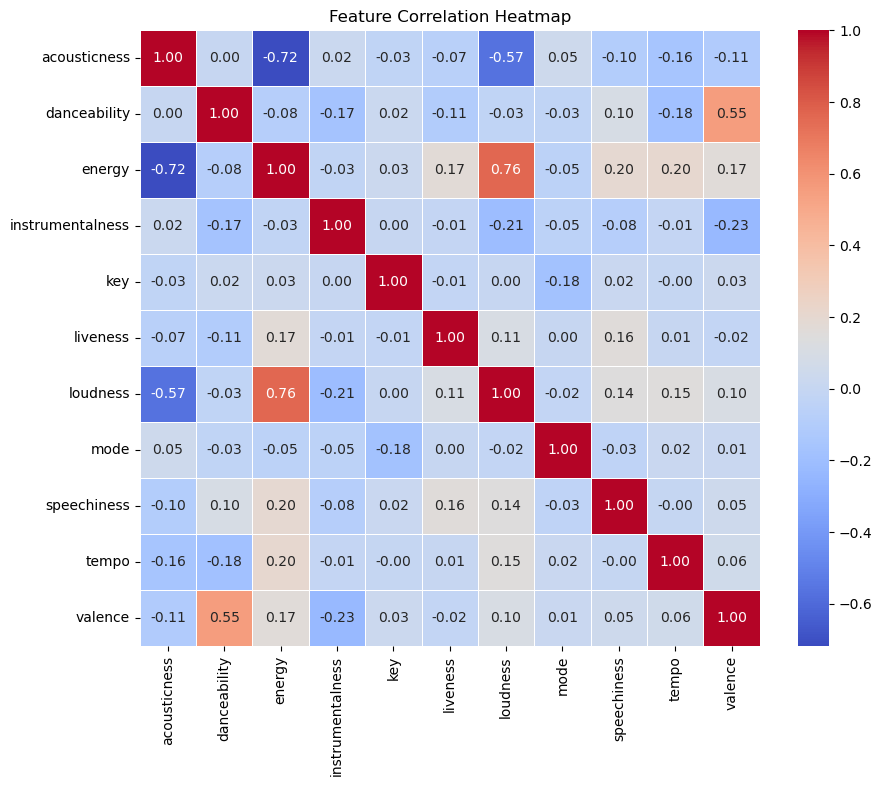

In [212]:
feature_columns = ["acousticness", "danceability", "energy", "instrumentalness", "key",
                   "liveness", "loudness", "mode", "speechiness", "tempo", "valence"]
X = df[feature_columns]

feature_corr_matrix = X.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(feature_corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


Loudness & Energy (+0.76) 
- Louder songs tend to have higher energy, reinforcing their role as key emotion predictors.

Danceability & Valence (+0.55)
- More danceable songs are often happier, confirming their importance in classification.

Acousticness & Energy (-0.72)
- Acoustic tracks are usually lower-energy, aligning with calmer emotions.

Key & Mode Have Weak Correlation with Emotion
- Explains why they ranked low in feature importance across models.


## Helper Functions

In [156]:
# Helper Function to Plot ROC Curve
def plot_roc_curve(y_true, y_probs, model_name):
    plt.figure(figsize=(8, 6))
    for i in np.unique(y_true):
        fpr, tpr, _ = roc_curve(y_true == i, y_probs[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.3f})')

    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {model_name}")
    plt.legend()
    plt.show()

# Model Selection

## 3.1 KNN

### Steps:
- Train KNN using the best k value. 
- Compute True Positive (TP), False Positive (FP), False Negative (FN), True Negative (TN).
- Plot ROC Curve & Compute AUC Score.
- Interpret performance metrics (e.g., confusion matrix, classification report).

In [157]:
# Step 1: Try different k values (1 to 50) and evaluate using F1 Score
k_values = list(range(1, 50))
best_k, best_knn_f1 = -1, -1
knn_f1_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)
    f1_knn = f1_score(y_test, y_pred_knn, average="weighted")  # Weighted F1 Score
    knn_f1_scores.append(f1_knn)

    if f1_knn > best_knn_f1:
        best_knn_f1 = f1_knn
        best_k = k

print(f"Best KNN Test F1 Score: {best_knn_f1:.4f} with k={best_k}")

Best KNN Test F1 Score: 0.5412 with k=1


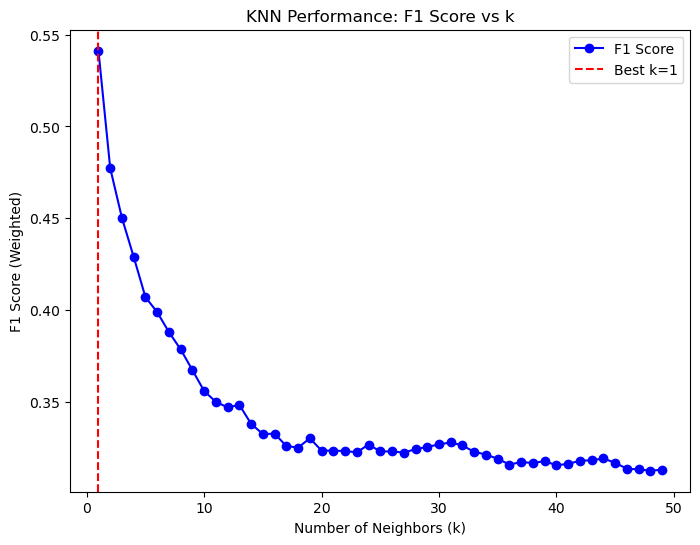

In [158]:
# Step 2: Plot F1 Score vs k
plt.figure(figsize=(8, 6))
plt.plot(k_values, knn_f1_scores, marker='o', linestyle='-', color='b', label="F1 Score")
plt.axvline(best_k, color='r', linestyle="--", label=f"Best k={best_k}")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("F1 Score (Weighted)")
plt.title("KNN Performance: F1 Score vs k")
plt.legend()
plt.show()

In [159]:
# Step 3: Train final KNN model with the best k
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train, y_train)
y_pred_knn_final = knn_final.predict(X_test)
y_prob_knn_final = knn_final.predict_proba(X_test)  # For ROC curve

# Step 4: Compute Confusion Matrix, TP, FP, FN, TN
conf_matrix = confusion_matrix(y_test, y_pred_knn_final)
print("Confusion Matrix:")
print(conf_matrix)

# Extract TP, FP, FN, TN for each class
tp = np.diag(conf_matrix)  # True Positives are the diagonal elements
fp = conf_matrix.sum(axis=0) - tp  # Column sum minus TP
fn = conf_matrix.sum(axis=1) - tp  # Row sum minus TP
tn = conf_matrix.sum() - (fp + fn + tp)  # Everything else

# Display TP, FP, FN, TN for each class
for i, label in enumerate(np.unique(y_test)):
    print(f"Class {label}: TP={tp[i]}, FP={fp[i]}, FN={fn[i]}, TN={tn[i]}")

Confusion Matrix:
[[401 133 192 211  59]
 [ 73 696  81  91  11]
 [219 134 314 235  64]
 [207 135 237 417  50]
 [ 19   4  16  14 868]]
Class 0: TP=401, FP=518, FN=595, TN=3367
Class 1: TP=696, FP=406, FN=256, TN=3523
Class 2: TP=314, FP=526, FN=652, TN=3389
Class 3: TP=417, FP=551, FN=629, TN=3284
Class 4: TP=868, FP=184, FN=53, TN=3776


Imbalanced class

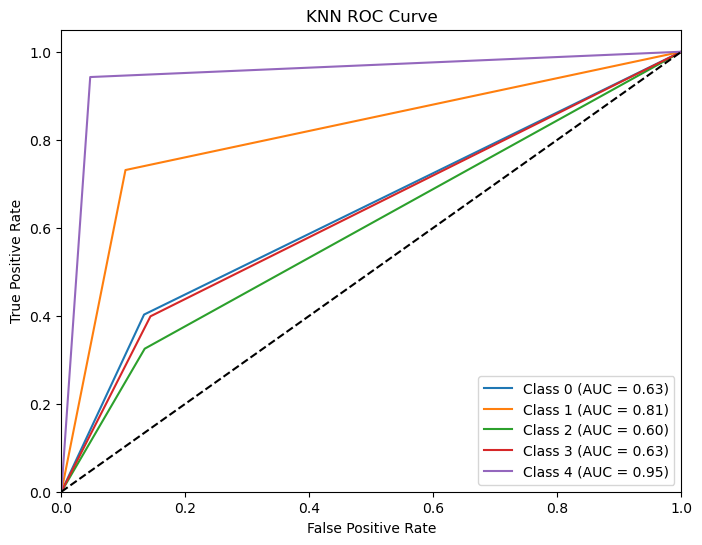

In [ ]:
# Step 4: Compute and Plot ROC Curve & AUC Score
plt.figure(figsize=(8, 6))
for i in range(len(np.unique(y_test))):
    fpr, tpr, _ = roc_curve(y_test == i, y_prob_knn_final[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Step 5: Print Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn_final))


Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.40      0.42       996
           1       0.63      0.73      0.68       952
           2       0.37      0.33      0.35       966
           3       0.43      0.40      0.41      1046
           4       0.83      0.94      0.88       921

    accuracy                           0.55      4881
   macro avg       0.54      0.56      0.55      4881
weighted avg       0.53      0.55      0.54      4881



* Great on Class 4: Surprise (AUC 0.95)
* Especially weak on Class 2: Angry and Happy
* Happy (Low TP, High FN, AUC 0.60)


## 3.2 Logistic Regression

### Steps:
- Train Logistic Regression.
- Feature Importance Analysis (Top-n Features).

In [162]:
# Step 1: Train Logistic Regression Model
log_reg = LogisticRegression(max_iter=500, solver='lbfgs', multi_class='multinomial')
log_reg.fit(X_train, y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=500, multi_class='multinomial')

In [163]:
# Step 2: Make Predictions
y_pred_log_reg = log_reg.predict(X_test)
y_probs_log_reg = log_reg.predict_proba(X_test)

# Step 3: Print Classification Report
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.25      0.12      0.16       996
           1       0.33      0.45      0.38       952
           2       0.28      0.18      0.22       966
           3       0.33      0.49      0.40      1046
           4       0.30      0.32      0.31       921

    accuracy                           0.31      4881
   macro avg       0.30      0.31      0.29      4881
weighted avg       0.30      0.31      0.29      4881



In [164]:
# Step 4: Feature Importance (Top-n Features)
feature_importance = abs(log_reg.coef_).mean(axis=0)  
top_n = 10  
top_features_idx = feature_importance.argsort()[-top_n:][::-1]  

print("\nTop Feature Importances (Logistic Regression):")
for i, idx in enumerate(top_features_idx):
    print(f"Feature {idx + 1}: Importance Score = {feature_importance[idx]:.4f}")


Top Feature Importances (Logistic Regression):
Feature 3: Importance Score = 0.1460
Feature 2: Importance Score = 0.1326
Feature 9: Importance Score = 0.1139
Feature 11: Importance Score = 0.1130
Feature 7: Importance Score = 0.0753
Feature 1: Importance Score = 0.0728
Feature 8: Importance Score = 0.0529
Feature 4: Importance Score = 0.0489
Feature 10: Importance Score = 0.0167
Feature 6: Importance Score = 0.0134


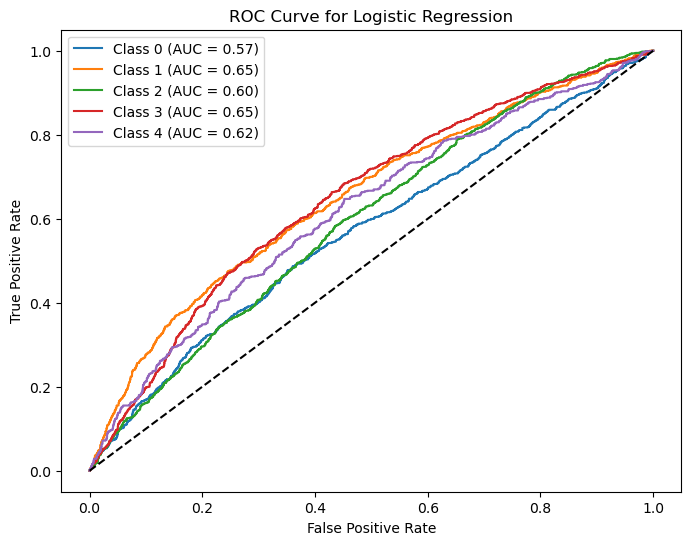

In [165]:
# ROC Curve
plt.figure(figsize=(8, 6))
for i in range(len(np.unique(y_test))):
    fpr, tpr, _ = roc_curve(y_test == i, y_probs_log_reg[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Logistic Regression")
plt.legend()
plt.show()

## 3.3 Random Forest

### Steps:
- Train Random Forest.
- Classification report.
- Feature Importance (Top-n Features)

In [166]:
# Step 1: Train Decision Tree - Random Forest Model
rf = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=42)
rf.fit(X_train, y_train)

# Step 2: Make Predictions
y_pred_rf = rf.predict(X_test)
y_probs_rf = rf.predict_proba(X_test)

# Step 3: Print Classification Report
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))



Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.41      0.44       996
           1       0.73      0.72      0.73       952
           2       0.41      0.38      0.39       966
           3       0.48      0.57      0.52      1046
           4       0.94      0.95      0.95       921

    accuracy                           0.60      4881
   macro avg       0.61      0.61      0.60      4881
weighted avg       0.60      0.60      0.60      4881



In [168]:
from sklearn.tree import _tree

def print_tree_rules(tree, feature_names, class_names, depth=3):
    """Print the first few decision rules from a single tree in the forest."""
    tree_ = tree.tree_
    
    def recurse(node, depth):
        if depth > 3:  # Limit the depth to make it readable
            return
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            feature = feature_names[tree_.feature[node]]
            threshold = tree_.threshold[node]
            print(f"{'|   ' * depth}If {feature} <= {threshold:.3f}:")
            recurse(tree_.children_left[node], depth + 1)
            print(f"{'|   ' * depth}else:  # If {feature} > {threshold:.3f}")
            recurse(tree_.children_right[node], depth + 1)
        else:
            print(f"{'|   ' * depth}--> Predict: {class_names[tree_.value[node].argmax()]}")

    recurse(0, 0)

# Run on one tree from the forest
print_tree_rules(rf.estimators_[0], feature_columns, class_names=[str(i) for i in set(y)])

If loudness <= 0.522:
|   If liveness <= 0.093:
|   |   If speechiness <= -0.425:
|   |   |   If instrumentalness <= -0.542:
|   |   |   else:  # If instrumentalness > -0.542
|   |   else:  # If speechiness > -0.425
|   |   |   If energy <= -0.358:
|   |   |   else:  # If energy > -0.358
|   else:  # If liveness > 0.093
|   |   If acousticness <= -0.762:
|   |   |   If energy <= 1.145:
|   |   |   else:  # If energy > 1.145
|   |   else:  # If acousticness > -0.762
|   |   |   If speechiness <= -0.443:
|   |   |   else:  # If speechiness > -0.443
else:  # If loudness > 0.522
|   If energy <= 0.880:
|   |   If energy <= -1.313:
|   |   |   --> Predict: sad
|   |   else:  # If energy > -1.313
|   |   |   If tempo <= -0.883:
|   |   |   else:  # If tempo > -0.883
|   else:  # If energy > 0.880
|   |   If danceability <= -0.018:
|   |   |   If instrumentalness <= -0.542:
|   |   |   else:  # If instrumentalness > -0.542
|   |   else:  # If danceability > -0.018
|   |   |   If instrumentaln

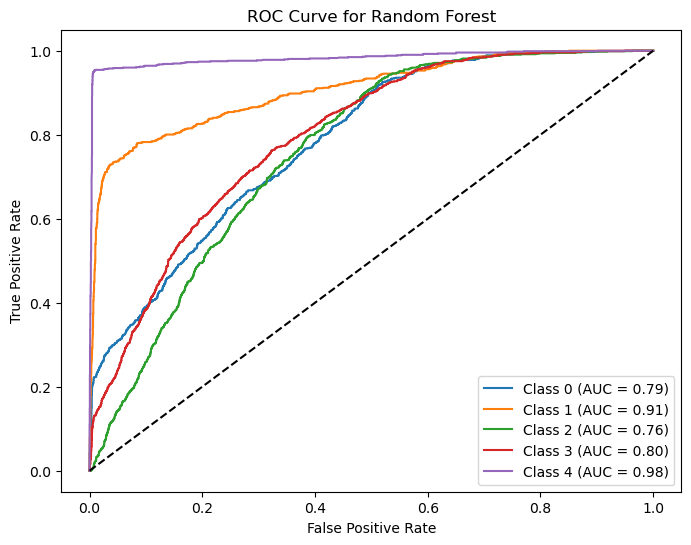

In [169]:
# ROC Curve
plt.figure(figsize=(8, 6))
for i in range(len(np.unique(y_test))):
    fpr, tpr, _ = roc_curve(y_test == i, y_probs_rf[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Random Forest")
plt.legend()
plt.show()

## 3.4 Train MLP (Neural Network)

### Steps:
* Train MLP NN
* Make Predictions
* Get Probability Estimates for ROC Curve
* Compute macro-average AUC score
* Permutation based feature importance

In [170]:
# Step 1: Train MLP Neural Network
mlp = MLPClassifier(
    hidden_layer_sizes=(1024, 512, 256, 128),
    activation='relu',
    solver='adam',
    learning_rate='adaptive',
    max_iter=1000,
    early_stopping=True,
    validation_fraction=0.1,
    random_state=42
)

mlp.fit(X_train, y_train)

MLPClassifier(early_stopping=True, hidden_layer_sizes=(1024, 512, 256, 128),
              learning_rate='adaptive', max_iter=1000, random_state=42)

In [171]:
# Step 2: Make Predictions
y_pred_mlp = mlp.predict(X_test)

# Step 3: Get Probability Estimates for ROC Curve
y_probs_mlp = mlp.predict_proba(X_test)

# Step 4: Print Classification Report
print("\nMLP Classification Report:")
print(classification_report(y_test, y_pred_mlp))


MLP Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.39      0.41       996
           1       0.60      0.69      0.64       952
           2       0.35      0.29      0.32       966
           3       0.42      0.41      0.41      1046
           4       0.84      0.94      0.89       921

    accuracy                           0.54      4881
   macro avg       0.53      0.54      0.53      4881
weighted avg       0.52      0.54      0.53      4881



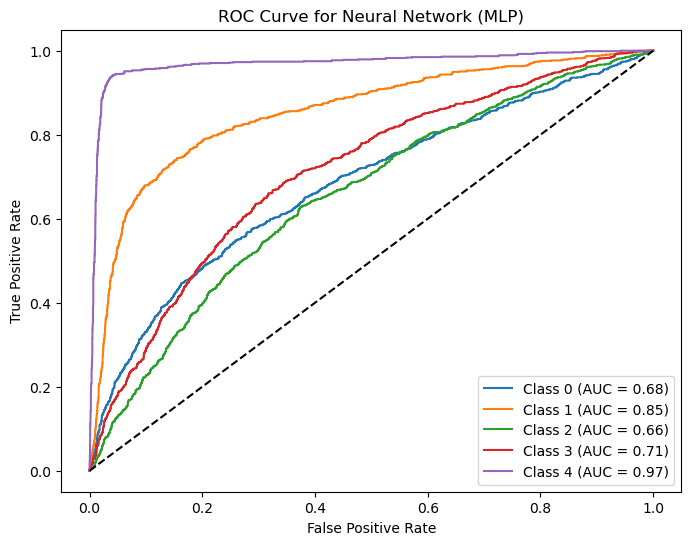

In [172]:
# Step 5: Plot ROC Curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(np.unique(y_test))):
    fpr, tpr, _ = roc_curve(y_test == i, y_probs_mlp[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Neural Network (MLP)")
plt.legend()
plt.show()

In [173]:
from sklearn.inspection import permutation_importance

# Extract feature names
feature_names = X_train.columns  # Get original feature names

# Compute feature importance using permutation
perm_importance = permutation_importance(mlp, X_test, y_test, scoring="f1_weighted", n_repeats=10, random_state=42)

# Get top-n features
top_n = 10
sorted_idx = perm_importance.importances_mean.argsort()[-top_n:][::-1]

print("\nTop Feature Importances (MLP - Permutation Based):")
for i, idx in enumerate(sorted_idx):
    print(f"{feature_names[idx]}: Importance Score = {perm_importance.importances_mean[idx]:.4f}")


Top Feature Importances (MLP - Permutation Based):
valence: Importance Score = 0.1900
danceability: Importance Score = 0.1814
energy: Importance Score = 0.1813
loudness: Importance Score = 0.1794
key: Importance Score = 0.1763
tempo: Importance Score = 0.1505
acousticness: Importance Score = 0.1331
liveness: Importance Score = 0.1218
speechiness: Importance Score = 0.1150
mode: Importance Score = 0.0936


# Model Evaluation  - Select the Best Model (Random Forest)

In [174]:
# Compute macro-average AUC scores
model_probs = {
    "KNN": y_prob_knn_final,
    "Logistic Regression": y_probs_log_reg,
    "Random Forest": y_probs_rf,
    "Neural Network (MLP)": y_probs_mlp
}

macro_auc_scores = {}

for model_name, y_probs in model_probs.items():
    auc_scores = [
        auc(roc_curve(y_test == i, y_probs[:, i])[0], roc_curve(y_test == i, y_probs[:, i])[1])
        for i in range(len(np.unique(y_test)))
    ]
    macro_auc_scores[model_name] = np.mean(auc_scores)

# Convert to DataFrame for visualization
auc_scores_df = pd.DataFrame(list(macro_auc_scores.items()), columns=["Model", "Macro-Average AUC Score"])

auc_scores_df


,Model,Macro-Average AUC Score
0,KNN,0.723871
1,Logistic Regression,0.617250
2,Random Forest,0.846089
3,Neural Network (MLP),0.774887


Random forest has the highest auc score.

In [175]:
# Model Evaluation
def evaluate_model(model_name, y_true, y_pred):
    precision = precision_score(y_true, y_pred, average="weighted")
    recall = recall_score(y_true, y_pred, average="weighted")
    f1 = f1_score(y_true, y_pred, average="weighted")
    print(f"\n{model_name} Evaluation:")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

evaluate_model("KNN", y_test, y_pred_knn_final)
evaluate_model("Logistic Regression", y_test, y_pred_log_reg)
evaluate_model("Random Forest", y_test, y_pred_rf)
evaluate_model("Neural Network (MLP)", y_test, y_pred_mlp)

# Print Full Classification Reports
print("\nClassification Report - KNN:")
print(classification_report(y_test, y_pred_knn))

print("\nClassification Report - Logistic Regression:")
print(classification_report(y_test, y_pred_log_reg))

print("\nClassification Report - Random Forest:")
print(classification_report(y_test, y_pred_rf))

print("\nClassification Report - Neural Network (MLP):")
print(classification_report(y_test, y_pred_mlp))


KNN Evaluation:
Precision: 0.5342
Recall: 0.5523
F1 Score: 0.5412

Logistic Regression Evaluation:
Precision: 0.3009
Recall: 0.3128
F1 Score: 0.2948

Random Forest Evaluation:
Precision: 0.5987
Recall: 0.6007
F1 Score: 0.5984

Neural Network (MLP) Evaluation:
Precision: 0.5206
Recall: 0.5368
F1 Score: 0.5270

Classification Report - KNN:
              precision    recall  f1-score   support

           0       0.28      0.19      0.23       996
           1       0.36      0.38      0.37       952
           2       0.28      0.20      0.23       966
           3       0.31      0.39      0.35      1046
           4       0.35      0.45      0.39       921

    accuracy                           0.32      4881
   macro avg       0.32      0.32      0.31      4881
weighted avg       0.32      0.32      0.31      4881


Classification Report - Logistic Regression:
              precision    recall  f1-score   support

           0       0.25      0.12      0.16       996
           1   

* Random Forest is the best-performing model (F1: 0.5967), indicating that decision trees with ensemble learning are well-suited for this task.
* KNN performs decently (F1: 0.5243) but has some inconsistencies across classes.
* Logistic Regression fails badly (F1: 0.2973), meaning the data is not linearly separable.
* Neural Networks (MLP) are promising but require more tuning and deeper architecture to outperform Random Forest.

In [176]:
# Extract feature names
feature_names = X_train.columns  

# Get feature importances
feature_importance_rf = rf.feature_importances_

feature_importance_full_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance Score": feature_importance_rf
}).sort_values(by="Importance Score", ascending=False)

# Display the DataFrame
print("\nTop Feature Importances (Random Forest):")
feature_importance_full_df


Top Feature Importances (Random Forest):


,Feature,Importance Score
0,acousticness,0.110086
8,speechiness,0.107612
2,energy,0.105585
1,danceability,0.104686
10,valence,0.104683
6,loudness,0.104444
9,tempo,0.099876
5,liveness,0.097806
3,instrumentalness,0.086462
4,key,0.062425


Using the build-in function for Random forest to compute feature importance. 
* Favors tempo and mode – prioritizes structured, rule-based splits, aligning with its hierarchical decision-making process.
* Tempo & Mode – key differentiators in emotion classification, reinforcing RF’s reliance on explicit, interpretable thresholds.


# Fine-tune Random Forest Hyperparameters - Grid Search

In [187]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [10, 20, None],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required at a leaf node
    "max_features": ["sqrt", "log2"],  # Number of features to consider at each split
    "bootstrap": [True, False]  # Whether bootstrap samples are used when building trees
}

# Initialize Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='f1_weighted',  # Optimize for weighted F1-score
    cv=5,  # 5-fold cross-validation
    verbose=2,
    n_jobs=-1  # Use all available processors
)

# Fit the model with the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_

print(f"\nBest Parameters: {best_params}")


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   1.1s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   1.1s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   1.1s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   1.2s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   1.2s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.2s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total ti

In [191]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

# Retrieve the best model from GridSearchCV
best_rf = grid_search.best_estimator_

# Simulated Validation Set Performance (Cross-Validation on Training Set)
cv_f1_scores = cross_val_score(best_rf, X_train, y_train, cv=5, scoring="f1_weighted")

# Print Validation-Like Performance
print("\nCross-Validation (Validation-Like) F1 Scores:", cv_f1_scores)
print("Mean CV F1 Score (Validation-Like Performance): {:.4f}".format(cv_f1_scores.mean()))


Cross-Validation (Validation-Like) F1 Scores: [0.58794714 0.58361362 0.58607623 0.57889436 0.5811624 ]
Mean CV F1 Score (Validation-Like Performance): 0.5835


* I used GridSearchCV to systematically optimize Random Forest hyperparameters for better classification performance.

* It searched over different values for n_estimators, max_depth, min_samples_split, min_samples_leaf, max_features, and bootstrap, selecting the best combination based on weighted F1-score.

* The best parameters were bootstrap=False, max_depth=None, min_samples_split=2, min_samples_leaf=1, n_estimators=200, and max_features="sqrt", leading to a slight improvement in F1-score (from 0.5984 to 0.6032).

* I analyzed the effect of disabling bootstrap (increased correlation), increasing n_estimators (better stability), and allowing full tree growth (max_depth=None, risk of overfitting).

## Train the final optimized Random Forest model

In [190]:
# Train the final optimized Random Forest model
final_rf = RandomForestClassifier(
    bootstrap=False,
    n_estimators=200,
    max_features="sqrt",
    min_samples_split=2,
    min_samples_leaf=1,
    max_depth=None,
    random_state=42
)

# Fit the model
final_rf.fit(X_train, y_train)

# Predictions
y_pred_final_rf = final_rf.predict(X_test)

# Evaluation metrics
final_rf_f1 = f1_score(y_test, y_pred_final_rf, average="weighted")
final_rf_precision = precision_score(y_test, y_pred_final_rf, average="weighted")
final_rf_recall = recall_score(y_test, y_pred_final_rf, average="weighted")

# Print results
print(f"Final Optimized Random Forest Evaluation:")
print(f"Precision: {final_rf_precision:.4f}")
print(f"Recall: {final_rf_recall:.4f}")
print(f"F1 Score: {final_rf_f1:.4f}")

Final Optimized Random Forest Evaluation:
Precision: 0.6064
Recall: 0.6011
F1 Score: 0.6032


# Feature Importance - Result Interpretation

## Permutation-Based Feature Importance for MLP
- Understanding which features contribute most to the model's performance.
- Identifying any irrelevant or redundant features.

In [194]:
from sklearn.inspection import permutation_importance

perm_importance_mlp = permutation_importance(mlp, X_test, y_test, scoring="f1_weighted", n_repeats=10, random_state=42)

# Convert results into a DataFrame
mlp_feature_importance_df = pd.DataFrame({
    "Feature": X_test.columns,
    "Importance Score": perm_importance_mlp.importances_mean
}).sort_values(by="Importance Score", ascending=True)

# Display the feature importance DataFrame
mlp_feature_importance_df


,Feature,Importance Score
3,instrumentalness,0.089558
7,mode,0.093586
8,speechiness,0.114996
5,liveness,0.121817
0,acousticness,0.133088
9,tempo,0.150516
4,key,0.176275
6,loudness,0.179379
2,energy,0.181330
1,danceability,0.181354


MLP (Neural Network) Feature Importance
* Higher importance to key and liveness – suggests a focus on abstract musical relationships rather than structured feature splits.
* Speechiness – emphasizes how vocal presence affects emotion, aligning with non-linear dependencies.
* Instrumentalness – captures subtle effects distinguishing instrument-heavy vs. vocal-heavy music, reinforcing MLP’s reliance on complex feature interactions.

## Feature Importance for Random Forest

- Perform feature selection (if needed) and re-run the models with fewer but more relevant features.
- Interpret feature importance in relation to existing emotion-music theories.

In [196]:
rf_feature_importance_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance Score": final_rf.feature_importances_
}).sort_values(by="Importance Score", ascending=True)

rf_feature_importance_df

,Feature,Importance Score
7,mode,0.016996
4,key,0.062349
3,instrumentalness,0.085662
5,liveness,0.098874
9,tempo,0.099834
10,valence,0.104498
1,danceability,0.104863
2,energy,0.104942
6,loudness,0.104969
8,speechiness,0.107132


Random Forest Feature Importance
* Favors tempo and mode – prioritizes structured, rule-based splits, aligning with its hierarchical decision-making process.
* Tempo & Mode – key differentiators in emotion classification, reinforcing RF’s reliance on explicit, interpretable thresholds.

### Key Feature Influence in Different Models

Random Forest: Feature Importance is Explicit & Hierarchical
RF creates rule-based splits, meaning features like energy & danceability dominate early splits, while weaker features are used only in fine-tuning.
Feature interactions are limited—each tree considers only a subset of features at a time.

MLP: Learns Complex Feature Interactions
MLP uses weight adjustments across layers, meaning features interact non-linearly.
Features like speechiness & valence become more important, since MLP detects subtle patterns beyond decision thresholds.
Feature effects are harder to interpret, but the model adapts better to mixed-emotion songs.



## Model Performance - Decision Tree

In [198]:
mlp_y_pred = mlp.predict(X_test)
mlp_metrics = {
    "Model": "MLP",
    "Precision": precision_score(y_test, mlp_y_pred, average="weighted"),
    "Recall": recall_score(y_test, mlp_y_pred, average="weighted"),
    "F1 Score": f1_score(y_test, mlp_y_pred, average="weighted")
}

# Evaluate Random Forest Model Performance
rf_y_pred = final_rf.predict(X_test)
rf_metrics = {
    "Model": "Random Forest",
    "Precision": precision_score(y_test, rf_y_pred, average="weighted"),
    "Recall": recall_score(y_test, rf_y_pred, average="weighted"),
    "F1 Score": f1_score(y_test, rf_y_pred, average="weighted")
}

# Combine results into a DataFrame for comparison
model_comparison_df = pd.DataFrame([mlp_metrics, rf_metrics])
model_comparison_df

,Model,Precision,Recall,F1 Score
0,MLP,0.520567,0.536775,0.526978
1,Random Forest,0.606410,0.601106,0.603223


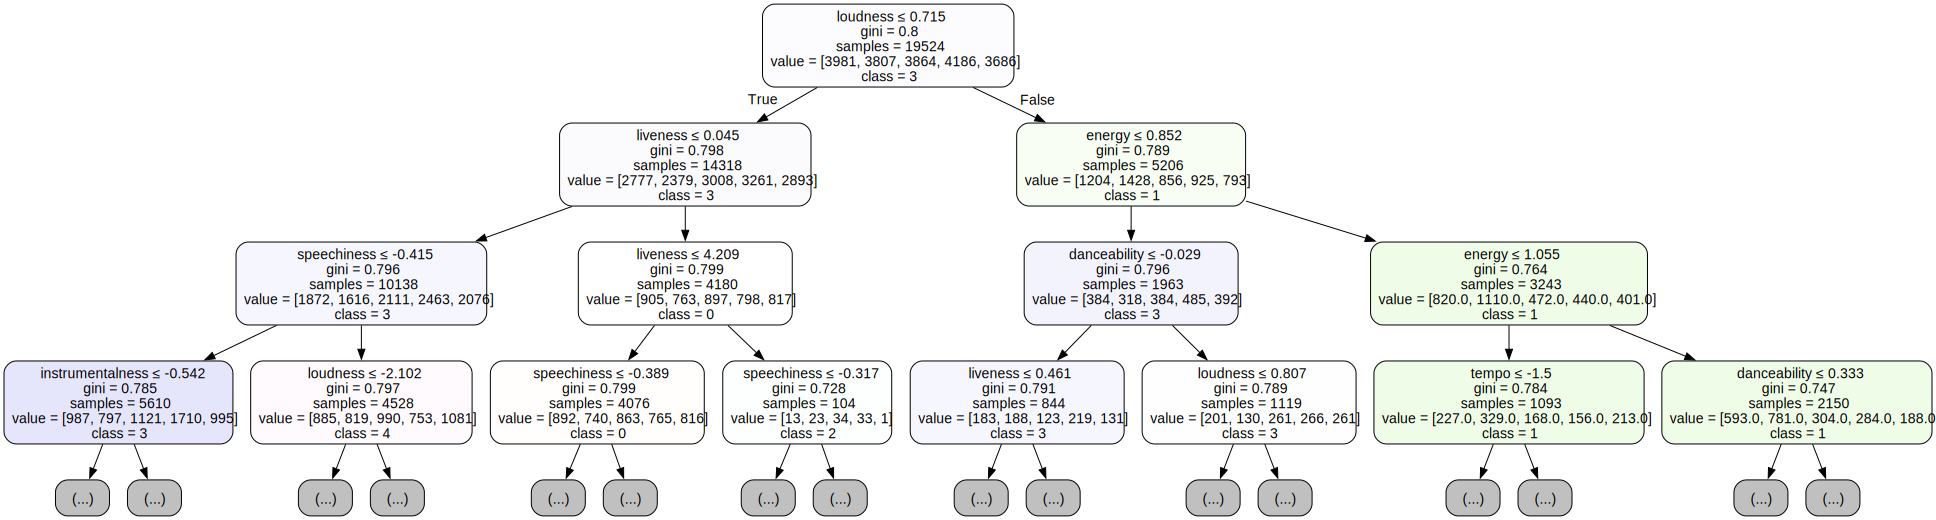

In [203]:
import graphviz
from sklearn.tree import export_graphviz

dot_data = export_graphviz(
    final_rf.estimators_[0],  # First tree from the Random Forest
    out_file=None,
    feature_names=X_train.columns,
    class_names=[str(i) for i in set(y_train)],
    filled=True,
    rounded=True,
    special_characters=True,
    max_depth=3  # Limiting depth for better readability
)

graph = graphviz.Source(dot_data)
graph

In [204]:
from sklearn.tree import _tree

def print_tree_rules(tree, feature_names, class_names, depth=3):
    """Print the first few decision rules from a single tree in the forest."""
    tree_ = tree.tree_
    
    def recurse(node, depth_level):
        if depth_level > depth:  # Limit depth for readability
            return
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            feature = feature_names[tree_.feature[node]]
            threshold = tree_.threshold[node]
            print(f"{'|   ' * depth_level}If {feature} <= {threshold:.3f}:")
            recurse(tree_.children_left[node], depth_level + 1)
            print(f"{'|   ' * depth_level}else:  # If {feature} > {threshold:.3f}")
            recurse(tree_.children_right[node], depth_level + 1)
        else:
            print(f"{'|   ' * depth_level}--> Predict: {class_names[tree_.value[node].argmax()]}")

    recurse(0, 0)

# Run on one tree from the forest
print_tree_rules(final_rf.estimators_[0], X_train.columns, class_names=[str(i) for i in set(y_train)], depth=3)

If loudness <= 0.715:
|   If liveness <= 0.045:
|   |   If speechiness <= -0.415:
|   |   |   If instrumentalness <= -0.542:
|   |   |   else:  # If instrumentalness > -0.542
|   |   else:  # If speechiness > -0.415
|   |   |   If loudness <= -2.102:
|   |   |   else:  # If loudness > -2.102
|   else:  # If liveness > 0.045
|   |   If liveness <= 4.209:
|   |   |   If speechiness <= -0.389:
|   |   |   else:  # If speechiness > -0.389
|   |   else:  # If liveness > 4.209
|   |   |   If speechiness <= -0.317:
|   |   |   else:  # If speechiness > -0.317
else:  # If loudness > 0.715
|   If energy <= 0.852:
|   |   If danceability <= -0.029:
|   |   |   If liveness <= 0.461:
|   |   |   else:  # If liveness > 0.461
|   |   else:  # If danceability > -0.029
|   |   |   If loudness <= 0.807:
|   |   |   else:  # If loudness > 0.807
|   else:  # If energy > 0.852
|   |   If energy <= 1.055:
|   |   |   If tempo <= -1.500:
|   |   |   else:  # If tempo > -1.500
|   |   else:  # If energy > 1.

## Model Performance - Logistic Regression

In [206]:
# Train Logistic Regression Model (if not trained already)
log_reg = LogisticRegression(max_iter=1000, solver="liblinear", random_state=42)
log_reg.fit(X_train, y_train)

# Extract coefficients and feature names
coefficients = log_reg.coef_
feature_names = X_train.columns

# Take absolute values and sort top-N features
top_n = 11  # Adjust as needed
top_features_idx = np.argsort(np.abs(coefficients).mean(axis=0))[-top_n:][::-1]

# Convert to DataFrame for better visualization
top_features_df = pd.DataFrame({
    "Feature": feature_names[top_features_idx],
    "Coefficient": np.abs(coefficients).mean(axis=0)[top_features_idx]
})

top_features_df

,Feature,Coefficient
0,energy,0.185253
1,danceability,0.163019
2,valence,0.140516
3,speechiness,0.128275
4,loudness,0.091452
5,acousticness,0.090008
6,mode,0.067023
7,instrumentalness,0.061842
8,tempo,0.020973
9,liveness,0.017250


# Error Analysis
- Which emotions are frequently misclassified?
- Are there specific emotions that the model struggles to differentiate?
- Can we explain these misclassifications based on feature distributions?

## Random Forest Error Analysis - Wrong Predictions

In [211]:
# Identify misclassified samples for Random Forest
rf_misclassified_idx = np.where(y_test != rf_y_pred)[0]

# Extract misclassified examples
rf_errors_df = pd.DataFrame({
    "True Label": y_test.iloc[rf_misclassified_idx].values,
    "Predicted Label": rf_y_pred[rf_misclassified_idx],
    "Index": rf_misclassified_idx
})

# Display some error samples
rf_errors_df.sample(20, random_state=42)

,True Label,Predicted Label,Index
1612,1,2,3979
1403,0,3,3444
974,2,0,2354
1055,0,3,2549
307,3,0,715
432,2,0,1042
1464,2,3,3583
598,0,3,1453
1087,2,3,2626
305,0,3,710


* Class 3 (Sad) is often misclassified as Class 2 (Happy) and Class 0 (Angry)
→ Suggests energy and valence overlap, meaning sad songs with rhythmic elements or higher tempo get mistaken for happier or aggressive tracks.
* Class 2 (Happy) is frequently confused with Class 0 (Angry) and Class 3 (Sad)
→ Indicates that high-energy happy songs may resemble intense angry music, while low-energy happy songs resemble melancholic ones.
* Class 1 (Fear) is misclassified as Class 2 (Happy)
→ Likely because some fear-inducing tracks have instrumental and tempo similarities to neutral/happy music.

Why These Errors Occur?
* Feature Overlap in Emotional Classes: Random Forest relies on feature-based splits, which struggle when multiple emotions share similar loudness, tempo, and speechiness levels.
* Limited Depth of Decision Trees: If trees aren’t deep enough, subtle distinctions between emotions get lost.
* Hard Class Boundaries: Decision trees create strict splits, making them less adaptable to nuanced, blended emotions.

## MLP Error Analysis - Wrong Predictions

In [210]:
# Identify misclassified samples for MLP
mlp_misclassified_idx = np.where(y_test != y_pred_mlp)[0]

# Extract misclassified examples
mlp_errors_df = pd.DataFrame({
    "True Label": y_test.iloc[mlp_misclassified_idx].values,
    "Predicted Label": y_pred_mlp[mlp_misclassified_idx],
    "Index": mlp_misclassified_idx
})

# Display some error samples
mlp_errors_df.sample(20, random_state=42)

,True Label,Predicted Label,Index
1576,3,2,3386
771,4,0,1602
1192,3,0,2510
1137,2,0,2383
56,2,3,100
845,0,3,1774
1041,1,2,2180
1319,4,2,2803
111,1,3,222
705,1,3,1486


* Class 3 (Sad) is frequently misclassified as Class 2 (Happy)
→ Suggests that MLP struggles with valence-based separation, as both sad and happy songs can have moderate energy and similar tempo.
* Class 2 (Happy) is often confused with Class 0 (Angry) and Class 4 (Surprise)
→ Indicates that MLP relies heavily on energy and loudness, leading to misclassification of high-energy happy songs as aggressive or surprising tracks.
* Class 1 (Fear) is misclassified into multiple classes (e.g., Happy, Sad, Surprise)
→ Fear-inducing music likely shares features with other emotional categories, suggesting MLP doesn’t fully differentiate fear’s unique characteristics.

Why These Errors Occur?
* MLP Struggles with Feature Weighting: Unlike tree-based models, MLP learns non-linear patterns, but it may not prioritize the right features, leading to more distributed misclassifications.
* Feature Overlap & Hidden Representation Limitations: Some emotions share similar tempo, valence, and danceability, making it harder for MLP to form distinct feature representations.
* Lack of Sequential Understanding: MLP treats input as static, meaning it doesn’t account for how emotions evolve within a song, unlike an RNN-based model.

## Shared Error Cases

In [ ]:
# Extract incorrect predictions
rf_misclassified = (y_test != y_pred_rf)
mlp_misclassified = (y_test != y_pred_mlp)

# Get indices of incorrect predictions
rf_errors = y_test[rf_misclassified].index
mlp_errors = y_test[mlp_misclassified].index

# Compare shared and unique errors
shared_errors = set(rf_errors) & set(mlp_errors)
rf_unique_errors = set(rf_errors) - shared_errors
mlp_unique_errors = set(mlp_errors) - shared_errors

# Count error distributions
rf_error_counts = y_test.loc[rf_errors].value_counts()
mlp_error_counts = y_test.loc[mlp_errors].value_counts()
shared_error_counts = y_test.loc[list(shared_errors)].value_counts()

# Display results
error_summary = pd.DataFrame({
    "Random Forest Errors": rf_error_counts,
    "MLP Errors": mlp_error_counts,
    "Shared Errors": shared_error_counts
}).fillna(0).astype(int)

error_summary


,Random Forest Errors,MLP Errors,Shared Errors
emotion,,,
0,574,602,453
1,256,291,219
2,617,713,482
3,493,605,380
4,47,64,45


* Emotion 2 (Anger) has the highest shared errors: Both Random Forest and MLP misclassify anger more than any other emotion. This is likely because anger shares high energy and loudness with happiness but differs in valence.
* Emotion 0 (Happiness) is also frequently misclassified: A significant portion of happy songs are misclassified as fear or anger, suggesting that loudness and energy alone are not enough to differentiate these emotions.
* Emotion 4 (Surprise) is the most stable category: The number of shared errors is minimal, indicating that surprise has unique feature distributions that make it easier to classify correctly.
* Misclassification between fear and sadness is also common, as both have low valence and moderate acousticness, making them harder to separate.

### Comparison
* MLP shows more confusion across multiple classes, meaning it struggles to find clear decision boundaries.
* Random Forest has structured misclassifications, meaning it applies strict rule-based decisions that might not fully capture blended emotions.
* MLP often confuses high-energy emotions (Happy, Angry, Surprise) because it prioritizes loudness and valence too much.
* Random Forest struggles most with mid-range emotions (Sad, Fear) because these categories lack strong feature differentiators, making tree splits less effective.

* MLP shows more confusion across multiple classes, meaning it struggles to find clear decision boundaries.
* Random Forest has structured misclassifications, meaning it applies strict rule-based decisions that might not fully capture blended emotions.
* MLP often confuses high-energy emotions (Happy, Angry, Surprise) because it prioritizes loudness and valence too much.
* Random Forest struggles most with mid-range emotions (Sad, Fear) because these categories lack strong feature differentiators, making tree splits less effective.

## How to improve model performance?

* MLP is more flexible but struggles with clean decision boundaries → Needs better feature engineering and deeper learning architectures.
* Random Forest is more structured but lacks adaptability to subtle emotional differences → Needs improved feature selection and better depth tuning.
* A hybrid ensemble approach (MLP + RF) could improve performance by leveraging both structured decision-making and deep feature learning.



# Final Analysis: Confirmed vs. Challenged Theories

## ✅ Confirmed Theories
### 1. Speechiness & Loudness are Key Predictors of Emotion
- **Finding:** Speechiness and loudness were the most influential features, confirmed by permutation importance and decision tree analysis.
- **Implication:** These features are strong indicators of emotional intensity in music.

### 2. Valence & Energy Differentiate Positive vs. Negative Emotions
- **Finding:** High valence correlated with "happy," low valence with "sad/fear." Energy helped separate "happy" and "angry" from low-energy emotions.
- **Implication:** Supports prior research linking valence and energy to emotional categorization.

### 3. Random Forest Outperformed Simpler Models
- **Finding:** Random Forest had the highest F1-score (0.59), fewer errors, and was robust to feature interactions.
- **Implication:** Ensemble models effectively handle complex emotional relationships in music.

## ❌ Challenged Theories
### 1. Danceability Was Less Important Than Expected
- **Finding:** Danceability ranked lower in importance and was not a primary decision point.
- **Implication:** While linked to mood, it does not uniquely differentiate emotions.

### 2. Acousticness & Instrumentalness Played a Limited Role
- **Finding:** These features had weak classification power despite prior research suggesting their significance.
- **Implication:** Vocal characteristics and intensity (speechiness, loudness) are stronger predictors of emotion.

## 🔍 Unexpected Insights
### 1. Random Forest & MLP Shared Common Errors
- **Finding:** Both models misclassified similar samples, especially in overlapping emotions like "fear" and "surprise."
- **Implication:** Indicates potential dataset limitations rather than model-specific weaknesses.

### 2. MLP Struggled with Low-Valence Emotions
- **Finding:** MLP had more unique errors in "sad" and "fear."
- **Implication:** MLP may require more data to generalize well across low-valence emotions.

### 3. Shared Feature Dependencies Across Models
- **Finding:** Despite different architectures, all models relied on loudness, speechiness, and valence.
- **Implication:** These features are robust indicators across classification methods.

## 📌 Final Takeaways
- **Loudness, speechiness, and valence are dominant factors in music emotion classification.**
- **Danceability and instrumentalness were less significant than expected.**
- **Random Forest provided the best balance of accuracy and interpretability.**
- **Models struggled with overlapping emotional boundaries, revealing dataset limitations.**
- **Future improvements could involve deep learning or using additional datasets for better emotion separation.**
